In [2]:
from utils import *

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

config = get_config('config.yaml')

[nltk_data] Downloading package stopwords to /Users/enlik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df2 = read_csv_from_gdrive(config['csv_input']['bolt_apple'])
total_reviews = len(df2)
unique_users  = len(df2['userName'].unique())
mean = df2['rating'].mean()

print(f'Total English reviews: {total_reviews} \n')
print(f'Total unique users : {unique_users}')
print(f'Total users who gave multiple reviews: {total_reviews - unique_users}\n')
print(f'Average rating for this app based on the textual reviews: {round(mean,2)} \n')

Total English reviews: 3154 

Total unique users : 3149
Total users who gave multiple reviews: 5

Average rating for this app based on the textual reviews: 3.02 



# NLP based Preprocessing

In [40]:
%run ./AR_Miner/AR_util.py
%run ./AR_Miner/AR_reviewInstance.py

# Inputs:
datasetName = "bolt" # four apps: facebook, templerun2, swiftkey, tapfish:
# datasetName = "templerun2" # four apps: facebook, templerun2, swiftkey, tapfish
rmStopWords = True # Removing stop words lead to information loss and bad f-score
rmRareWords = True # Remove the word with low frequency
skParse = False # set skParse True to directly read of the data that has been filtered out

# Outputs:
if(skParse == False):
    trainSet, testSet, unlabelSet, vocabulary = AR_parse(datasetName, rmStopWords, rmRareWords)

print('\n')
# trainSet[0].printSelf()

Vocabulary size for bolt : 8550
Training set Size: 1852
Testing set Size: 1302
Unlabeling set Size: 3154




# Naive Bayes based Filtering

In [43]:
%run ./AR_Miner/AR_classifier.py
import time
start_time = time.clock()

useSVM = True # SVM is way better than EMNB in the testing
if(skParse == False):
    if(useSVM == False):
#         informRev, informMat = AR_emnb(trainSet, testSet, unlabelSet, vocabulary, datasetName)
        informRev, uninformRev, informMat = AR_emnb(trainSet, testSet, unlabelSet, vocabulary, datasetName)
    else:
#         informRev, informMat = AR_svm(trainSet, testSet, unlabelSet, vocabulary, datasetName)
        informRev, uninformRev, informMat = AR_svm(trainSet, testSet, unlabelSet, vocabulary, datasetName)
    print(time.clock() - start_time, "seconds")
    # write the result back to the file (optional)
    # AR_writeReviews(informRev, datasetName)
    
else:
    # directly read from the file
    informRev, informMat, vocabulary = AR_loadReviews(datasetName)

print("Number of informative reviews: " + str(len(informRev)))
print("Number of uninformative reviews: " + str(len(uninformRev)))
print('\n')
informRev[1].printSelf()
print('\n')
uninformRev[1].printSelf()

Average F-Score for the test data: 0.5602768601297344
0.4335130000000049 seconds
Number of informative reviews: 2940
Number of uninformative reviews: 214


Review id: 3155 Rating: 1 Content: annoy app definit worst stick uber driver arriv time fake say driver arriv far away today driver arriv within minut start drive away plan rout journey call custom support told driver around corner hous even though map show mile away told look around corner driver custom support contact driver claim wait minut custom support claim system show wait minut funni system show even though time order car wait minut get call driver custom servic possibl way driver wait minut even screenshot prove custom support tell charg offer next journey first time happen driver pleas stick uber app trash delet immedi Ntokens: 100 TS:  Group:  Prob: 1.0 label: 1
Raw text: so annoyed with this app definitely the worst of all of them sticking with uber from now on the driver arrival times are fake it says the drivers have 

# LDA topic clustering

In [44]:
%run ./AR_Miner/AR_lda.py

n_topics = 20 # the number of topics
doc_topic, vocab, top_words_list = AR_lda(informMat, vocabulary, n_topics)

Topic 0: e per non di il uber app
Topic 1: use ride code promo app card get
Topic 2: driver servic good friendli great nice use
Topic 3: le de est la à chauffeur et
Topic 4: driver cancel time app trip minut wait
Topic 5: code de promo cours avec le sur
Topic 6: die nicht und man der app ich
Topic 7: de le en la à pour un
Topic 8: de une et cours le je la
Topic 9: driver bolt like car could use peopl
Topic 10: app taxi use time car best taxifi
Topic 11: vou de est le pa c et
Topic 12: servic custom charg support app use bolt
Topic 13: j ai je de un et en
Topic 14: driver time app wait arriv minut min
Topic 15: que de la el en lo un
Topic 16: price journey charg driver rout take estim
Topic 17: uber bolt app use cheaper better price
Topic 18: et trè chauffeur super applic servic le
Topic 19: uber le que moin cher plu prix


# Ranking Algorithms for Importance

In [45]:
%run ./AR_Miner/AR_ranker.py

wg = [0.85, 0.15]
group_scores, sorted_group_indices = group_rank(doc_topic, wg, informRev)
print('Group scores:\n' + str(group_scores) + '\n')
print('Group in order of importance:\n' + str(sorted_group_indices))

Group scores:
[220.6448005381246, 196.24621745413287, 191.034012662355, 181.72621803212374, 169.91623116958456, 151.79404702922562, 141.26973464762622, 140.43969971043836, 127.78918557825115, 118.12358627660898, 112.04551591752737, 105.16552100961232, 101.05009474409954, 99.34732262879076, 99.01467861001441, 86.85765077825114, 85.4549546190088, 62.90521212893116, 58.13286963770394, 51.10048251958233]

Group in order of importance:
[4, 3, 2, 12, 8, 5, 14, 17, 1, 18, 11, 10, 19, 16, 9, 7, 13, 15, 0, 6]


In [46]:
%run ./AR_Miner/AR_textrank.py

AR_tfIdf(informRev)
rankrevText = AR_textrank(doc_topic, informRev)

In construct the graph of reviews ---- Nodes: 71 Edges: 12
In construct the graph of reviews ---- Nodes: 161 Edges: 96
In construct the graph of reviews ---- Nodes: 315 Edges: 3718
In construct the graph of reviews ---- Nodes: 287 Edges: 38
In construct the graph of reviews ---- Nodes: 337 Edges: 68
In construct the graph of reviews ---- Nodes: 212 Edges: 316
In construct the graph of reviews ---- Nodes: 37 Edges: 0
In construct the graph of reviews ---- Nodes: 65 Edges: 12
In construct the graph of reviews ---- Nodes: 223 Edges: 24
In construct the graph of reviews ---- Nodes: 95 Edges: 6
In construct the graph of reviews ---- Nodes: 109 Edges: 242
In construct the graph of reviews ---- Nodes: 106 Edges: 40
In construct the graph of reviews ---- Nodes: 243 Edges: 66
In construct the graph of reviews ---- Nodes: 55 Edges: 10
In construct the graph of reviews ---- Nodes: 143 Edges: 42
In construct the graph of reviews ---- Nodes: 54 Edges: 44
In construct the graph of reviews ---- Nodes

In [47]:
# print the top two reviews of the first five groups:
for i in range(5): # number of groups to print
    print("Instance review for topic group: " + str(i))
    for j in range(2): # number of top reviews to print
        r_ind = rankrevText[i][j][0]
        score = rankrevText[i][j][1]
        print(str(j+1) + "th review " + "Text: " +  informRev[r_ind].text + " Score: " + str(score))
    print ("\n")    

Instance review for topic group: 0
1th review Text: servizio taxi veloce efficiente ed incredibilmente economico sicuramente il modo migliore per muoversi a kaunas provare per credere Score: 0.05464460887478457
2th review Text: app non proprio semplice da usare ma il servizio è ottimo Score: 0.05464460887478457


Instance review for topic group: 1
1th review Text: it s a free cab because i gave my friend a code but it tried taking 10 out of my account Score: 0.013774100420119284
2th review Text: simple and efficient keep giving discount please Score: 0.01377410042011928


Instance review for topic group: 2
1th review Text: very pleased so far easy fast and comfortable Score: 0.0034542314271353426
2th review Text: comfortable and easy to use also better price than others Score: 0.003454231427135342


Instance review for topic group: 3
1th review Text: 2 fois plus cher qu uber c est n importe quoi les prix Score: 0.014409207858035943
2th review Text: les délais d attente ne sont pas du t

In [48]:
%run ./AR_Miner/AR_reviewRanking.py

AR_tfIdf(informRev)
weight = [0.25, 0.25, 0.25, 0.25]
rankrevTopic = instance_ranking(doc_topic, weight, informRev)

17th topic has reviews: 277
4th topic has reviews: 477
12th topic has reviews: 412
14th topic has reviews: 293
9th topic has reviews: 185
10th topic has reviews: 203
16th topic has reviews: 173
1th topic has reviews: 249
2th topic has reviews: 391
19th topic has reviews: 187
0th topic has reviews: 57
18th topic has reviews: 213
13th topic has reviews: 154
6th topic has reviews: 51
5th topic has reviews: 276
8th topic has reviews: 354
7th topic has reviews: 152
15th topic has reviews: 61
3th topic has reviews: 425
11th topic has reviews: 223


# Visualization

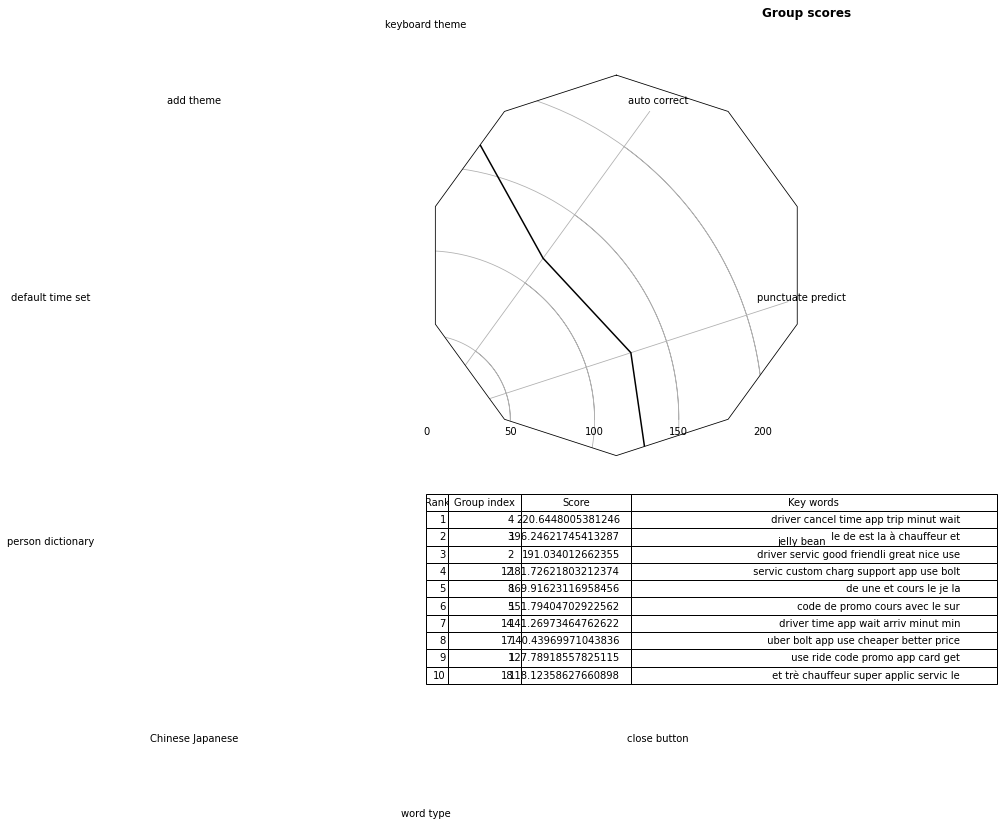

Ranking all the reviews in the first group via text rank


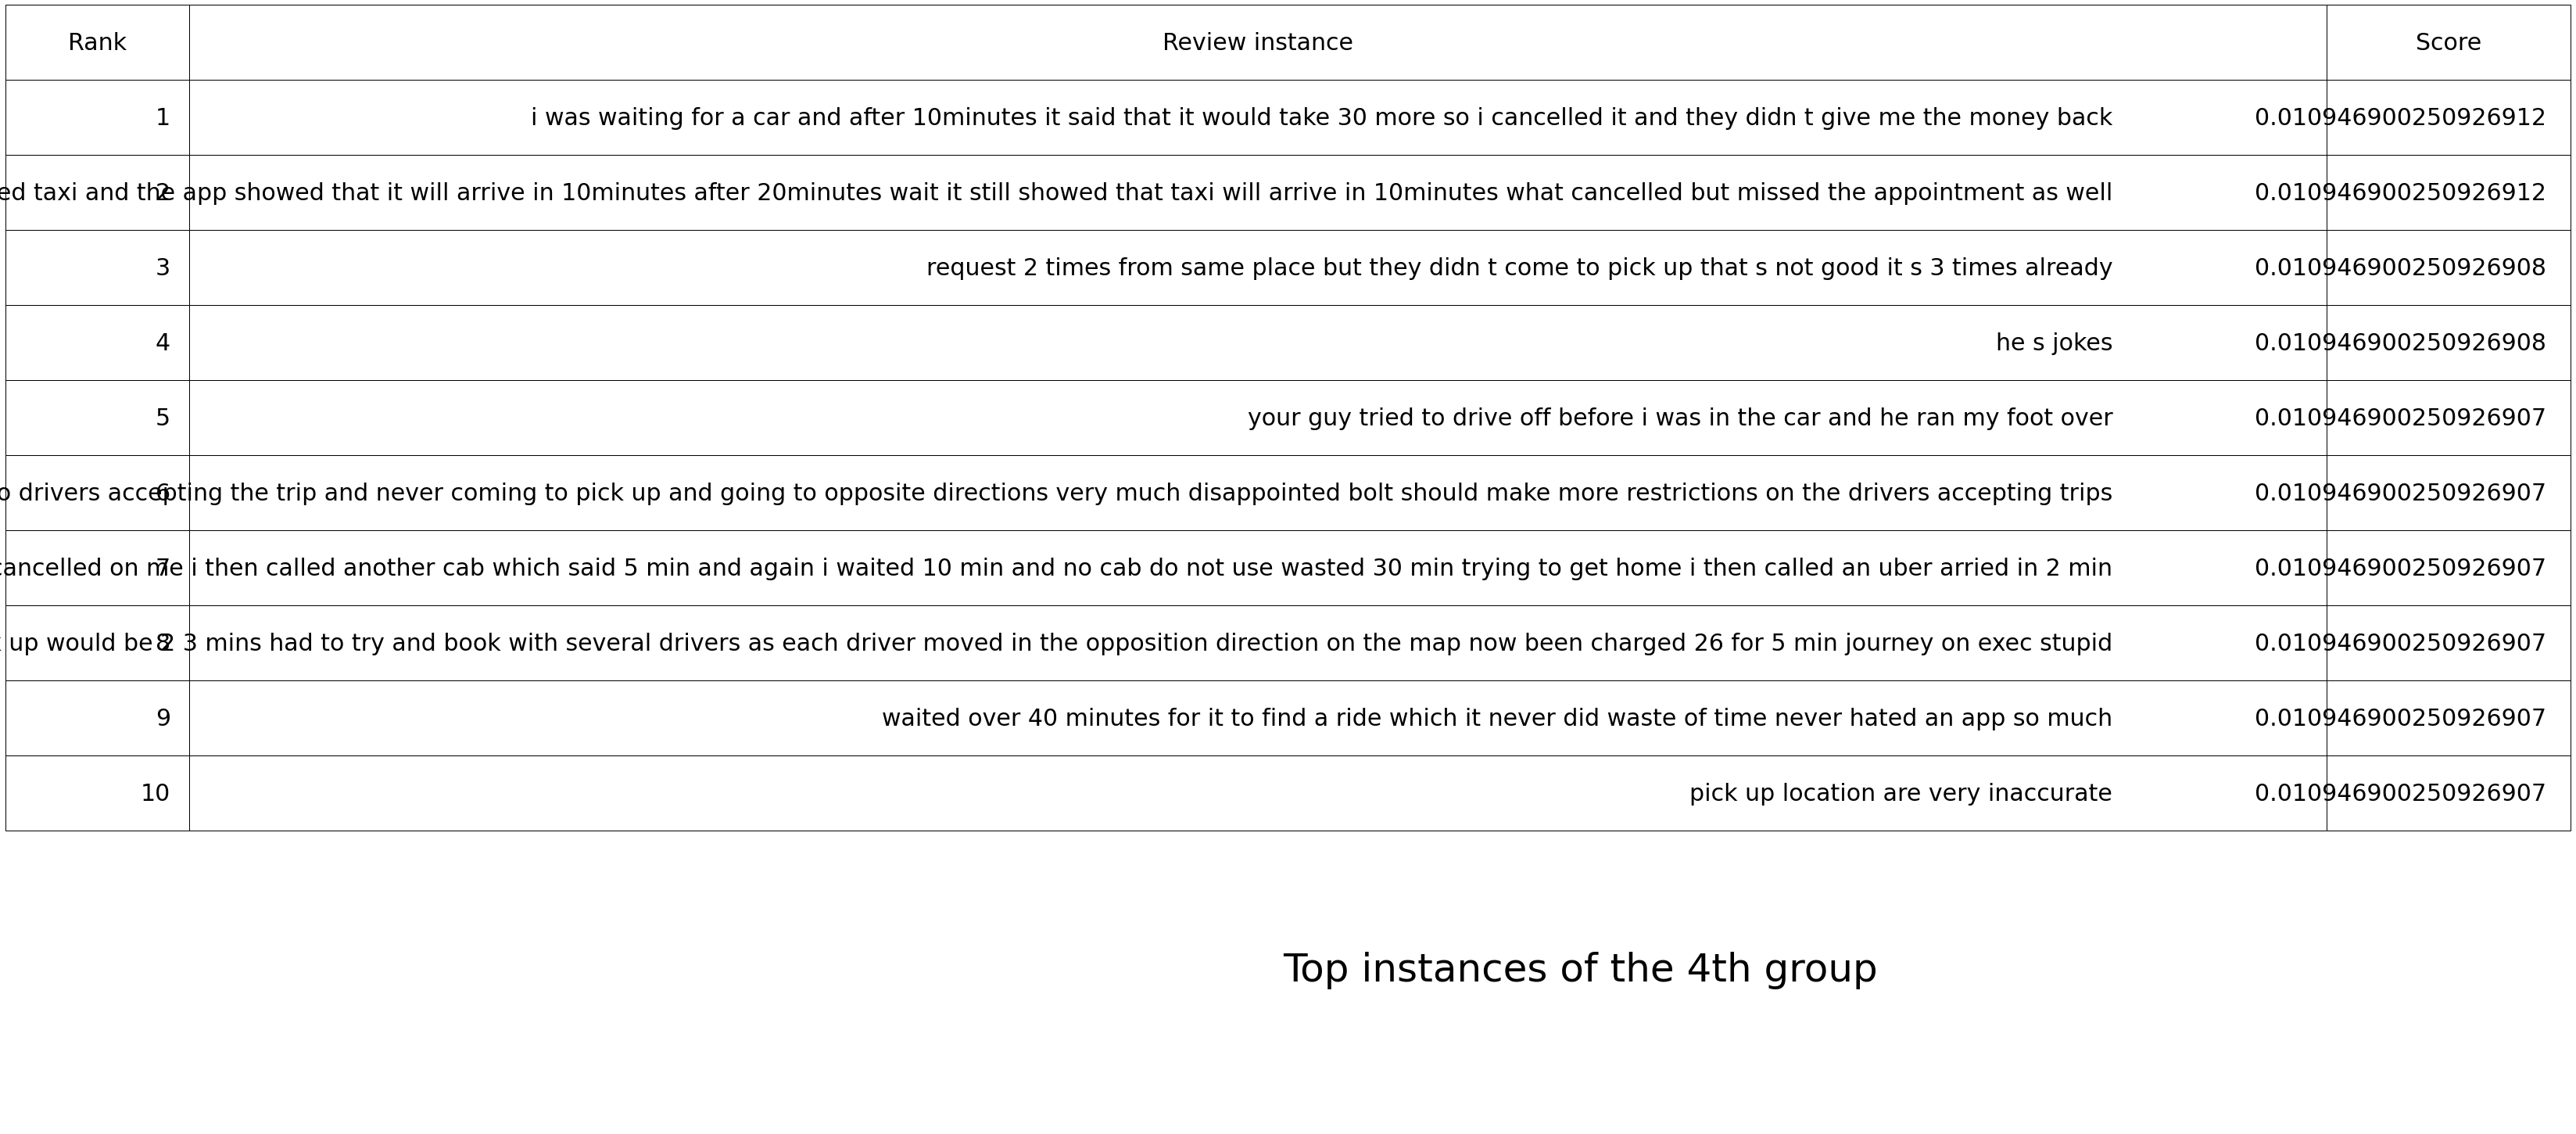

Ranking all the reviews in the first group via topic modeling


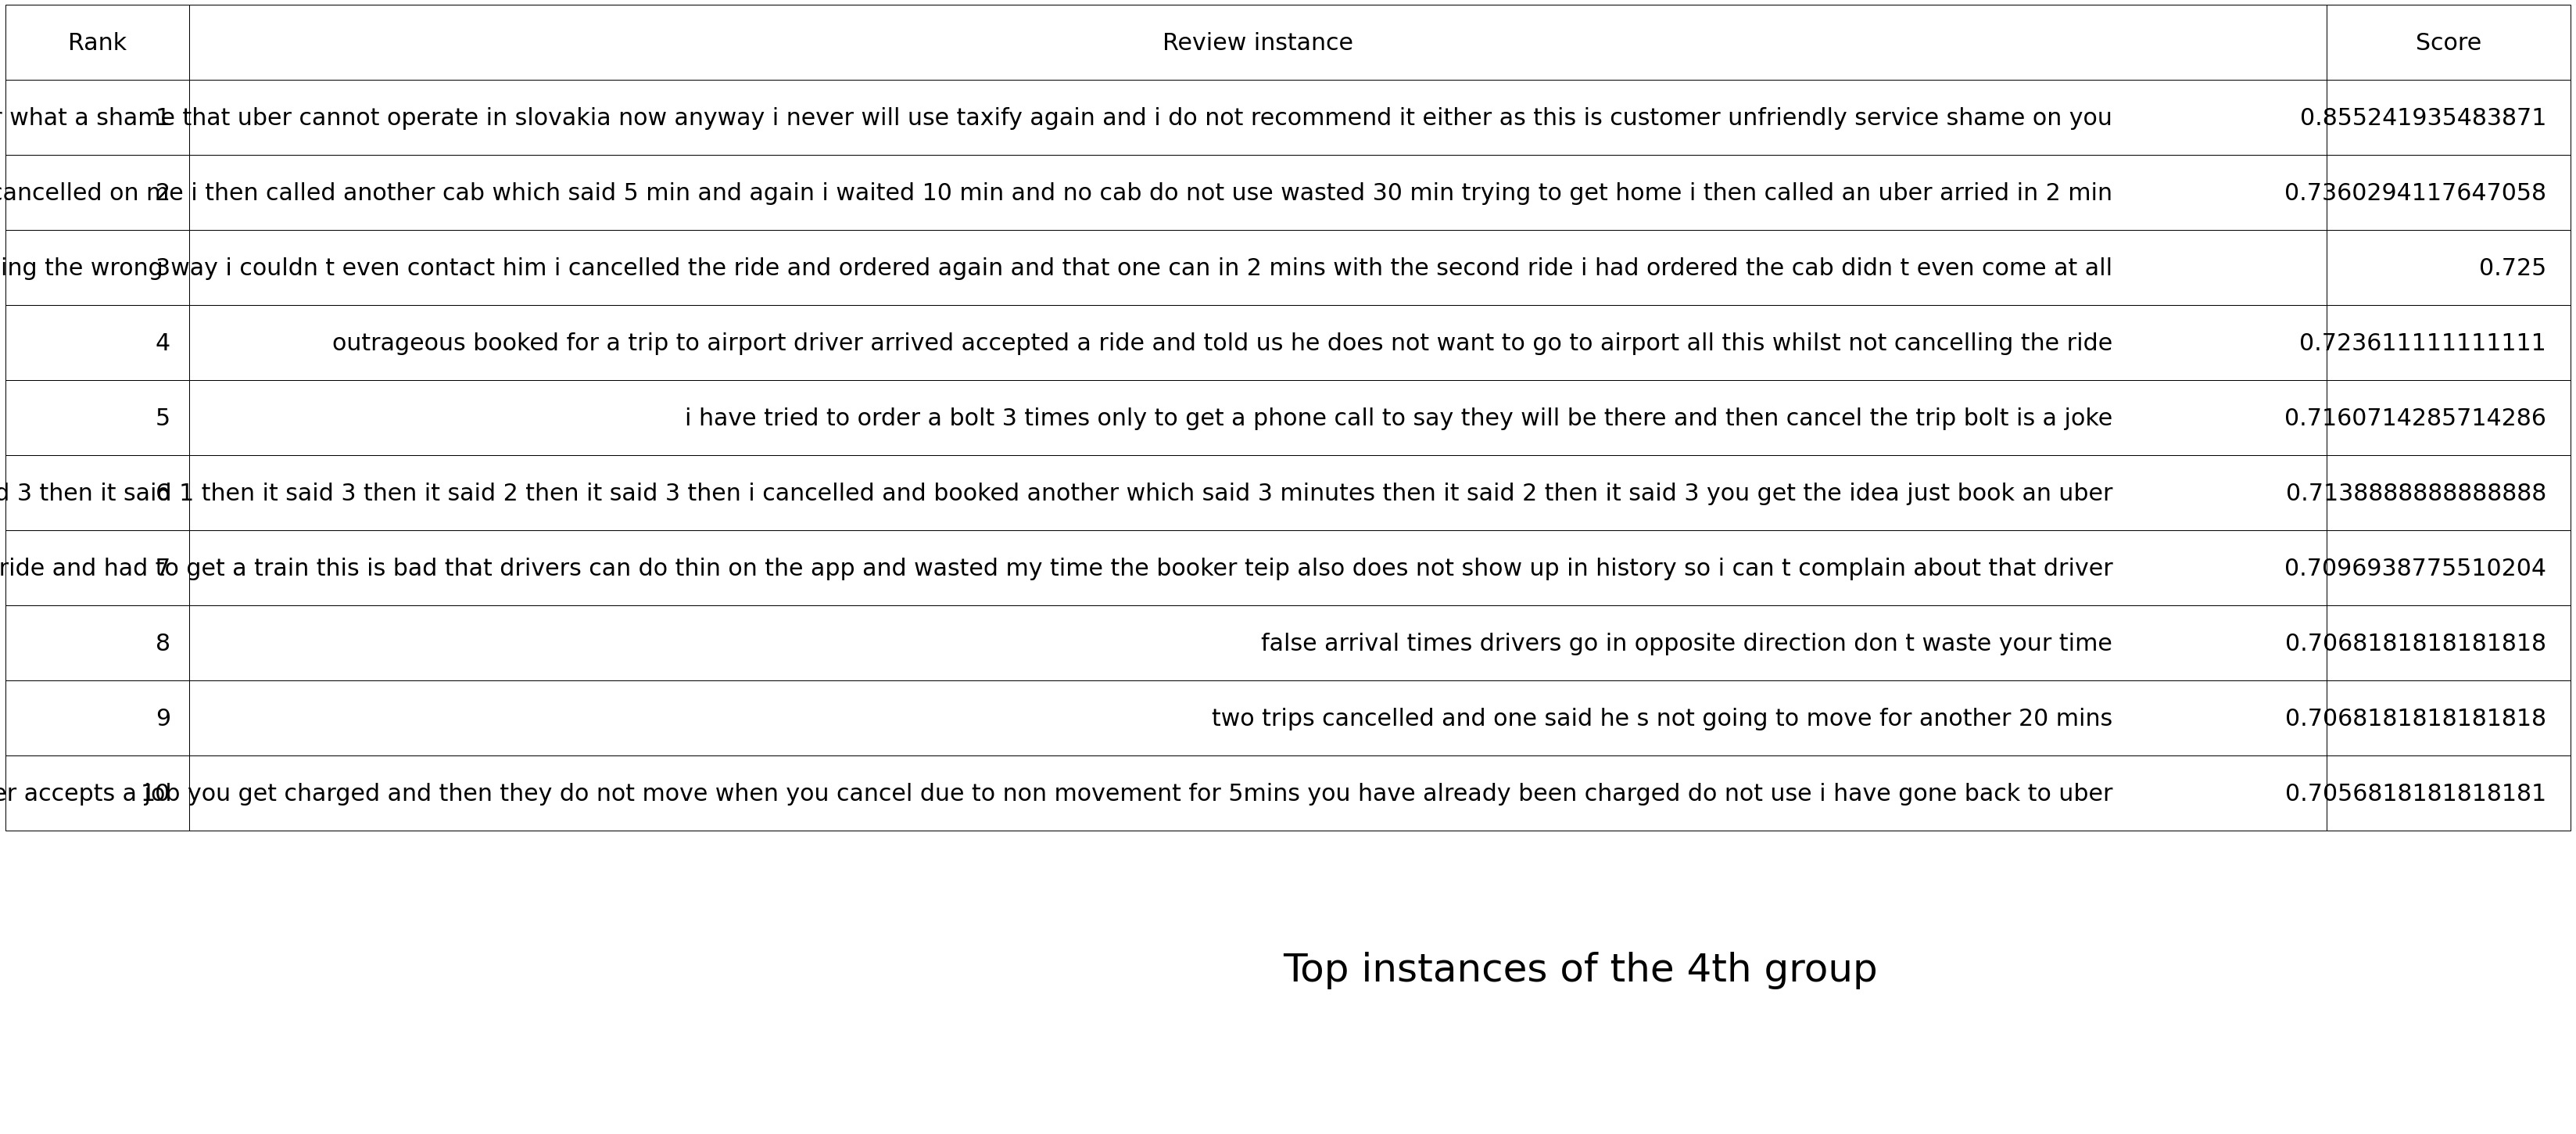

In [49]:
%run ./AR_Miner/AR_visualization.py

group_count = 10
plot_group_ranking(group_scores, sorted_group_indices, top_words_list, group_count)
print("Ranking all the reviews in the first group via text rank")
plot_instance_ranking(sorted_group_indices[0], informRev, rankrevText, 10)
print("Ranking all the reviews in the first group via topic modeling")
plot_instance_ranking(sorted_group_indices[0], informRev, rankrevTopic, 10)